# Louisiana 2017 Coastal Master Plan Analysis

## Prepare code

In [ ]:
# Geopandas is an open source library for working with geographic data using the
#   data structures library "pandas" (common in Python for data processing).
#   (https://geopandas.org/)
!pip install geopandas  &>/dev/null;

# Topojson is an open source library that lets us keep file sizes small when
#   working with geographic data, so the Notebooks can run faster while still
#   working with detailed shapes. (https://github.com/mattijn/topojson)
!pip install topojson &>/dev/null;

# Install rtree to enable geopandas to clip data and do spatial joins
!pip install rtree &>/dev/null;

import pandas
import geopandas
import topojson
import rtree
import folium

print("Done!")

Done!


## Add flood depths data from CPRA

In [ ]:
# Add flood depths data
# This will take several minutes
import requests, zipfile, io, json

url = "https://cims.coastal.louisiana.gov/masterplan/downloads/zips/2017/2017_MasterPlan_Flood_Depths.zip?v=1.0.5.9"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")

areas = geopandas.read_file("/content/shapefile/MP2017_Flood_Depths.shp")
areas = areas.to_crs(5070) # Convert areas geography to Albers Equal Area 

# Get samples
url ="https://raw.githubusercontent.com/ericnost/LA_MasterPlan_Analysis/main/samples.json"
response = requests.get(url)
samples = json.loads(response.content)
samples

# Map a sample
m = folium.Map()
p = folium.GeoJson(
  areas[areas['pt_v03_ind'].isin(samples['areas'])], # Show a sample of areas
).add_to(m)
bounds = m.get_bounds()
m.fit_bounds(bounds, padding=0)
display(m)

## Process the data to prepare our two tests

In [ ]:
"""
Remove extra columns, keep the ones necessarily for our two tests. Keep:
Test 1 (DIFFERENCE)
- FWOA_High_F100YR_depth_50 aka FWOA_High_7
- FWP_High_F100YR_depth_50 aka FWP_High_7
Test 2 (CHANGE)
- Current_F100YR_depth_01 aka Current_F1
- FWP_High_F100YR_depth_50 aka FWP_High_7
"""
    
areas = areas[["pt_v03_ind", "FWOA_Hig_6", "FWP_High_7", "Current_F1", "geometry"]]
areas

pt_v03_ind  FWOA_Hig_6  FWP_High_7  Current_F1  \
0           77897       12.48      10.230        4.99   
1           95302       20.82      19.360       11.05   
2           13390       10.98       6.820        0.00   
3           13363        0.00       0.000        0.00   
4           13136       12.30      12.285        3.66   
...           ...         ...         ...         ...   
86550       27386        0.00       0.000        0.00   
86551       27375        0.00       0.000        0.00   
86552       27188        0.00       0.000        0.00   
86553       28693        0.00       0.000        0.00   
86554       28178        0.00       0.000        0.00   

                                                geometry  
0      POLYGON ((580756.467 820563.464, 580770.828 82...  
1      MULTIPOLYGON (((584439.269 798364.294, 584218....  
2      POLYGON ((511419.887 794920.384, 511427.047 79...  
3      MULTIPOLYGON (((437291.845 789892.125, 437292....  
4      POLYGON ((291270.410 784258.728, 291427.499 78...  
...                                                  ...  
86550  POLYGON ((559597.128 841178.639, 559650.010 84...  
86551  POLYGON ((559521.298 841300.495, 559521.443 84...  
86552  POLYGON ((560099.848 840482.601, 560127.229 84...  
86553  POLYGON ((565138.049 842898.936, 565101.528 84...  
86554  POLYGON ((565505.328 843015.239, 565203.576 84...  

[86555 rows x 5 columns]

# Calculate the two tests

In [ ]:
# Create test 1 and test 2 fields
areas["Test 1"] = areas ["FWOA_Hig_6"] - areas ["FWP_High_7"]
areas["Test 2"] = areas ["Current_F1"] - areas ["FWP_High_7"]
areas

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


pt_v03_ind  FWOA_Hig_6  FWP_High_7  Current_F1  \
0           77897       12.48      10.230        4.99   
1           95302       20.82      19.360       11.05   
2           13390       10.98       6.820        0.00   
3           13363        0.00       0.000        0.00   
4           13136       12.30      12.285        3.66   
...           ...         ...         ...         ...   
86550       27386        0.00       0.000        0.00   
86551       27375        0.00       0.000        0.00   
86552       27188        0.00       0.000        0.00   
86553       28693        0.00       0.000        0.00   
86554       28178        0.00       0.000        0.00   

                                                geometry  Test 1  Test 2  
0      POLYGON ((580756.467 820563.464, 580770.828 82...   2.250  -5.240  
1      MULTIPOLYGON (((584439.269 798364.294, 584218....   1.460  -8.310  
2      POLYGON ((511419.887 794920.384, 511427.047 79...   4.160  -6.820  
3      MULTIPOLYGON (((437291.845 789892.125, 437292....   0.000   0.000  
4      POLYGON ((291270.410 784258.728, 291427.499 78...   0.015  -8.625  
...                                                  ...     ...     ...  
86550  POLYGON ((559597.128 841178.639, 559650.010 84...   0.000   0.000  
86551  POLYGON ((559521.298 841300.495, 559521.443 84...   0.000   0.000  
86552  POLYGON ((560099.848 840482.601, 560127.229 84...   0.000   0.000  
86553  POLYGON ((565138.049 842898.936, 565101.528 84...   0.000   0.000  
86554  POLYGON ((565505.328 843015.239, 565203.576 84...   0.000   0.000  

[86555 rows x 7 columns]

## Add census block data

In [ ]:
# Add census block data
# This could take several minutes
url = "https://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_22_pophu.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")

cbs = geopandas.read_file("/content/tabblock2010_22_pophu.shp")
cbs = cbs.loc[cbs["POP10"] > 0] # We will only consider places with measured population!
cbs = cbs.to_crs(5070) # Albers Equal Area (US)

# Map a sample
m = folium.Map()
p = folium.GeoJson(
  cbs[cbs['BLOCKID10'].isin(samples['cbs'])], # Show a sample of areas
).add_to(m)
folium.GeoJsonTooltip(['BLOCKID10', "POP10"]).add_to(p)

bounds = m.get_bounds()
m.fit_bounds(bounds, padding=0)
display(m)

## Calculate Census Block population estimates (specifically, % white/nonwhite)

In [ ]:
# Calculate CB pop estimates
# Install a tool to help with Census data
# https://pypi.org/project/CensusData/
!pip install censusdata &>/dev/null;
import censusdata 

data = censusdata.download('sf1', 2010, censusdata.censusgeo([('state', '22'), 
  ('county', '*'), ('tract', '*'), ('block', '*')]), ['P005003', 'P001001', 'GEO_ID']) 
# Census Variable P005003 = Total!!Not Hispanic or Latino!!White alone
# Census Variable P001001 = Total Population
data["GEOID15"] = data["GEO_ID"].str.slice(start=9) # Get rid of extraneous ID information

data.reset_index(drop=True, inplace=True)
data.set_index("GEOID15", inplace=True)
data.index = data.index.astype(str)

data

P005003  P001001                    GEO_ID
GEOID15                                                    
220019601001000       26       50  1000000US220019601001000
220019601001001        0        0  1000000US220019601001001
220019601001002        0        0  1000000US220019601001002
220019601001003        0        0  1000000US220019601001003
220019601001004        0        0  1000000US220019601001004
...                  ...      ...                       ...
221279604003061       19       19  1000000US221279604003061
221279604003062       28       30  1000000US221279604003062
221279604003063        0        0  1000000US221279604003063
221279604003064        0        0  1000000US221279604003064
221279604003065        1        2  1000000US221279604003065

[204447 rows x 3 columns]

## Join the Census Block data with the population estimates

In [ ]:
# Join with cbs on blockid10(15) / geoid15
cbs.set_index("BLOCKID10", inplace=True) # Pop10 and P001001 should match exactly because they are both 2010 total population counts
cbs = cbs.join(data)
cbs

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE PARTFLG  HOUSING10  \
BLOCKID10                                                                   
220019602003010        22        001    960200    3010       N          1   
220019602003128        22        001    960200    3128       N          2   
220019601002001        22        001    960100    2001       N          7   
220019601001010        22        001    960100    1010       N         18   
220019601001007        22        001    960100    1007       N         16   
...                   ...        ...       ...     ...     ...        ...   
221279602005215        22        127    960200    5215       N         11   
221279602001097        22        127    960200    1097       N          4   
221279601002070        22        127    960100    2070       N         10   
221279602005006        22        127    960200    5006       N          6   
221279602005015        22        127    960200    5015       N          2   

                 POP10                                           geometry  \
BLOCKID10                                                                   
220019602003010      3  POLYGON ((349505.004 822458.976, 348578.227 82...   
220019602003128      5  POLYGON ((351950.138 822592.831, 351951.850 82...   
220019601002001     20  POLYGON ((361604.806 824702.236, 361369.478 82...   
220019601001010     41  POLYGON ((362410.759 822796.269, 362336.447 82...   
220019601001007     44  POLYGON ((363081.590 822933.931, 363116.767 82...   
...                ...                                                ...   
221279602005215     24  POLYGON ((288220.442 969221.822, 288236.610 96...   
221279602001097      9  POLYGON ((302715.219 994919.502, 302710.194 99...   
221279601002070     22  POLYGON ((322011.700 1004151.415, 322011.910 1...   
221279602005006     16  POLYGON ((308026.442 976249.714, 308013.292 97...   
221279602005015      1  POLYGON ((308769.453 976110.925, 308781.660 97...   

                 P005003  P001001                    GEO_ID  
BLOCKID10                                                    
220019602003010        3        3  1000000US220019602003010  
220019602003128        5        5  1000000US220019602003128  
220019601002001       20       20  1000000US220019601002001  
220019601001010       30       41  1000000US220019601001010  
220019601001007       36       44  1000000US220019601001007  
...                  ...      ...                       ...  
221279602005215       18       24  1000000US221279602005215  
221279602001097        9        9  1000000US221279602001097  
221279601002070       22       22  1000000US221279601002070  
221279602005006       16       16  1000000US221279602005006  
221279602005015        1        1  1000000US221279602005015  

[100666 rows x 11 columns]

## Calculate Census Block areas

In [ ]:
# Calculate CB area in prep for weighted pop estimates
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html
cbs["Area"] = cbs.area * .000001 # Convert from sq m to sq km
cbs

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE PARTFLG  HOUSING10  \
BLOCKID10                                                                   
220019602003010        22        001    960200    3010       N          1   
220019602003128        22        001    960200    3128       N          2   
220019601002001        22        001    960100    2001       N          7   
220019601001010        22        001    960100    1010       N         18   
220019601001007        22        001    960100    1007       N         16   
...                   ...        ...       ...     ...     ...        ...   
221279602005215        22        127    960200    5215       N         11   
221279602001097        22        127    960200    1097       N          4   
221279601002070        22        127    960100    2070       N         10   
221279602005006        22        127    960200    5006       N          6   
221279602005015        22        127    960200    5015       N          2   

                 POP10                                           geometry  \
BLOCKID10                                                                   
220019602003010      3  POLYGON ((349505.004 822458.976, 348578.227 82...   
220019602003128      5  POLYGON ((351950.138 822592.831, 351951.850 82...   
220019601002001     20  POLYGON ((361604.806 824702.236, 361369.478 82...   
220019601001010     41  POLYGON ((362410.759 822796.269, 362336.447 82...   
220019601001007     44  POLYGON ((363081.590 822933.931, 363116.767 82...   
...                ...                                                ...   
221279602005215     24  POLYGON ((288220.442 969221.822, 288236.610 96...   
221279602001097      9  POLYGON ((302715.219 994919.502, 302710.194 99...   
221279601002070     22  POLYGON ((322011.700 1004151.415, 322011.910 1...   
221279602005006     16  POLYGON ((308026.442 976249.714, 308013.292 97...   
221279602005015      1  POLYGON ((308769.453 976110.925, 308781.660 97...   

                 P005003  P001001                    GEO_ID      Area  
BLOCKID10                                                              
220019602003010        3        3  1000000US220019602003010  0.206858  
220019602003128        5        5  1000000US220019602003128  0.089043  
220019601002001       20       20  1000000US220019601002001  0.338307  
220019601001010       30       41  1000000US220019601001010  2.364103  
220019601001007       36       44  1000000US220019601001007  1.791272  
...                  ...      ...                       ...       ...  
221279602005215       18       24  1000000US221279602005215  4.235127  
221279602001097        9        9  1000000US221279602001097  1.198421  
221279601002070       22       22  1000000US221279601002070  1.245761  
221279602005006       16       16  1000000US221279602005006  1.309106  
221279602005015        1        1  1000000US221279602005015  0.036736  

[100666 rows x 12 columns]

## Find the intersection of modeled areas and Census Blocks

In [ ]:
# First, we'll *show* their overlap
# Create map
m = folium.Map()

# Map style
style_function = lambda x: {'fillColor': '#0000ff' if 'pt_v03_ind' in x['properties'] else '#00ff00',
  'weight': 1 if 'pt_v03_ind' in x['properties'] else 3 } # stronger outlines for Census blocks, thinner ones for modeled areas

# Show a sample of Census blocks
# Select blocks that intersect with sample modeled areas
# Load pre-defined sampled intersections
ints = geopandas.read_file("https://github.com/ericnost/LA_MasterPlan_Analysis/raw/main/cb_area_intersection.geojson")
ints = ints.loc[ints["POP10"] > 0]
ints = ints.to_crs(5070) # Albers Equal Area (US)

b = folium.GeoJson(
  ints, # Show a sample of areas
  style_function = style_function
).add_to(m)
folium.GeoJsonTooltip(['BLOCKID10', "POP10"]).add_to(b)

# Show a sample of modeled areas
p = folium.GeoJson(
  areas[areas['pt_v03_ind'].isin(samples['areas'])], # Show a sample of areas
  style_function = style_function
).add_to(m)
folium.GeoJsonTooltip(['Test 1', 'Test 2']).add_to(p)

bounds = m.get_bounds()
m.fit_bounds(bounds, padding=0)
display(m)

In [ ]:
# Now, we'll calculate this overlap and show the result
# Find intersection of areas and census blocks to produce new shapes based on these. 
# This may take a long time! It is the most intensive calculation in the notebook.
gdf_int = geopandas.overlay(areas, cbs, how='intersection')

# Create map
m = folium.Map()

# Show a sample of modeled areas intersecting with Census blocks
p = folium.GeoJson(
  gdf_int[gdf_int['pt_v03_ind'].isin(samples['areas'])], # Show a sample of areas
).add_to(m)
folium.GeoJsonTooltip(['Test 1', 'Test 2', "POP10"]).add_to(p)

bounds = m.get_bounds()
m.fit_bounds(bounds, padding=0)
display(m)

## Calculate each modeled area's share of the entire census block's population

In [ ]:
# Calculate each modeled area's share of CB Population (Weighted Pop)
# First, calculate modeled area geometry
gdf_int["This_Area"] = gdf_int.area * .000001 # Convert from sq m to sq km # The area of the modeled areas
gdf_int["Weighted_Pop"] = round(gdf_int["P001001"] * (gdf_int["This_Area"]/gdf_int["Area"])) # Divide the modeled areas' areas by the total area of the census block they are a part of. Multiply by population
gdf_int["Weighted_White_Pop"] = round(gdf_int["P005003"] * (gdf_int["This_Area"]/gdf_int["Area"]))

# Map a sample
m = folium.Map()

# Map style
style_function = lambda x: {'weight': 1} # thinner outlines

# Map areas
p = folium.GeoJson(
  gdf_int[gdf_int['pt_v03_ind'].isin(samples['areas'])], # Show a sample of areas
  style_function=style_function
).add_to(m)
folium.GeoJsonTooltip(['Test 1', 'Test 2', "Weighted_Pop"]).add_to(p)

bounds = m.get_bounds()
m.fit_bounds(bounds, padding=0)
display(m)

In [ ]:
# Export gdf_int
gdf_int.to_file('intersecting_areas.geojson', driver='GeoJSON')  

# Exclude some areas (where weighted population = 0 and where areas do not and are not expected to flood)

In [ ]:
# Filter to where weighted pop is > 0
popareas = gdf_int.loc[gdf_int['Weighted_Pop'] > 0] 
# Exclude modeled areas that do not flood (Current_F1) and are not expected to flood w or w/o projects (FWOA_Hig_6	FWP_High_7) # This is ~ 85,000 "places"! It is important to note these.
popfloodareas = popareas.loc[~((popareas["Current_F1"]==0) & (popareas["FWOA_Hig_6"]==0) & (popareas["FWP_High_7"]==0))]

# Map a sample
m = folium.Map()

# Map style
style_function = lambda x: {'weight': 1} # thinner outlines

# Map populated flood areas
p = folium.GeoJson(
  popfloodareas[popfloodareas['pt_v03_ind'].isin(samples['areas'])], # Show a sample of areas
  style_function = style_function
).add_to(m)
folium.GeoJsonTooltip(['Test 1', 'Test 2', "Weighted_Pop"]).add_to(p)

bounds = m.get_bounds()
m.fit_bounds(bounds, padding=0)
display(m)

In [ ]:
# Export pop flood areas
popfloodareas.to_file("popfloodareas.geojson", driver="GeoJSON")

## Produce some summary statistics for our tests

In [ ]:
# Summary stats
display(popfloodareas["Test 1"].median())
display(popfloodareas["Test 2"].median())
display(popfloodareas["Weighted_Pop"].sum())

2.3449999999999998

-1.33

609927.0

## Load in Social Vulnerability Index Block Group data from CPRA

In [ ]:
# Load SVI data
url = "https://cims.coastal.louisiana.gov/masterplan/downloads/zips/2017/2017_MasterPlan_Social_Vulnerability.zip?v=1.0.5.9"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content/svi")

bgs = geopandas.read_file("/content/svi/shapefile/SVI_blockgroup_20160115.shp")
bgs = bgs.to_crs(5070) # convert to Albers EA
bgs

GEOID   FIPS   EcoPop_Cat   RurPop_Cat   AgePop_Cat NonEng_Cat  \
0     221010406001  22101       Medium  Medium High       Medium     Medium   
1     220570218003  22057  Medium High       Medium       Medium     Medium   
2     220630409024  22063       Medium  Medium High       Medium     Medium   
3     220510205161  22051  Medium High          Low       Medium       High   
4     220510205111  22051       Medium   Medium Low       Medium     Medium   
...            ...    ...          ...          ...          ...        ...   
1627  220710004001  22071       Medium       Medium       Medium     Medium   
1628  220510250031  22051       Medium       Medium   Medium Low     Medium   
1629  220510250023  22051       Medium   Medium Low  Medium High       High   
1630  220710008002  22071  Medium High       Medium       Medium     Medium   
1631  220710009012  22071       Medium       Medium  Medium High     Medium   

       NatRes_Cat  NurHom_Cat   DisDep_Cat   AsnRes_Cat   SocVul_Cat  \
0          Medium      Medium       Medium       Medium       Medium   
1          Medium      Medium       Medium       Medium  Medium High   
2     Medium High  Medium Low       Medium       Medium       Medium   
3      Medium Low      Medium  Medium High          Low       Medium   
4          Medium      Medium       Medium       Medium       Medium   
...           ...         ...          ...          ...          ...   
1627       Medium      Medium       Medium       Medium       Medium   
1628   Medium Low      Medium       Medium       Medium       Medium   
1629   Medium Low      Medium       Medium       Medium       Medium   
1630       Medium      Medium       Medium  Medium High       Medium   
1631   Medium Low      Medium          Low       Medium       Medium   

        Shape_Leng    Shape_Area  \
0      8891.973361  3.117267e+06   
1      6853.929316  6.884954e+05   
2     55055.725888  9.631285e+07   
3      2820.117876  4.608769e+05   
4      3565.266551  4.669425e+05   
...            ...           ...   
1627   3978.219175  9.634518e+05   
1628   3611.696730  7.236016e+05   
1629   3473.702745  6.412598e+05   
1630   2231.148530  2.946099e+05   
1631   2012.364948  2.458906e+05   

                                               geometry  
0     POLYGON ((458678.277 746203.461, 458405.842 74...  
1     POLYGON ((522018.585 754008.590, 522015.267 75...  
2     POLYGON ((507411.738 812353.737, 507419.285 81...  
3     POLYGON ((552189.453 787166.501, 552198.802 78...  
4     POLYGON ((553254.193 790421.096, 553188.992 79...  
...                                                 ...  
1627  POLYGON ((574209.127 782665.890, 574551.542 78...  
1628  POLYGON ((576439.288 775872.309, 576441.019 77...  
1629  POLYGON ((576501.196 777483.682, 576476.679 77...  
1630  POLYGON ((576568.215 783255.692, 576566.142 78...  
1631  POLYGON ((577798.378 783904.145, 577726.280 78...  

[1632 rows x 14 columns]

## Scale down SVI from Block Groups to Populated Flooded Areas

In [ ]:
# Scale down adds SVI properties to populated flood areas so that we can say areas in SVIs with XYZ characteristics
# Start by turning areas into centroids
popfloodareas["centroids"] = popfloodareas.centroid
popfloodareas = popfloodareas.set_geometry('centroids') 

# Join each BG SVI data to areas based on whether the centroids are within the BG.
join = geopandas.sjoin(popfloodareas, bgs) # default = inner, intersects  # this drops nans :(
join = join.set_geometry('geometry') 
join.drop("centroids", axis=1, inplace=True)

# Create map
m = folium.Map()

# Map style
style_function = lambda x: {'fillColor': '#0000ff' if 'Weighted_Pop' in x['properties'] else '#00ff00',
  'weight': 1 if 'Weighted_Pop' in x['properties'] else 3 } # stronger outlines for block groups

# Map a sample of block groups
b = folium.GeoJson(
  bgs[bgs['GEOID'].isin(['220570212002','220570214001','220570211003',
    '220570212003','220570211002','220570214002','220570211005',
    '220570211004','220570214003'])], # Show a sample of block group outlines
  style_function = style_function
).add_to(m)
folium.GeoJsonTooltip(['GEOID', "SocVul_Cat"]).add_to(b)

# Map a sample of populated flooded areas
p = folium.GeoJson(
  join[join['pt_v03_ind'].isin(samples['areas'])], # Show a sample of areas
  style_function = style_function
).add_to(m)
folium.GeoJsonTooltip(['Test 1', 'Test 2', "Weighted_Pop", "SocVul_Cat"]).add_to(p)

bounds = m.get_bounds()
m.fit_bounds(bounds, padding=0)
display(m)

## Categorize populated flooded areas as better off, worse off, or no difference under each test


In [ ]:
# Categorize modeled areas as better off, worse off, no difference
"""
Test 1:
- Positive > 1 ft: Better off
- Negative < -1 ft: Worse off
- Zero / In between: No Difference
Test 2:
- Positive > 1 ft: Better off
- Negative < -1 ft: Worse off
- Zero / In between: No Difference
"""
def catTest1(row):
  if row["Test 1"] >= 1:
    return "Better Off"
  elif row["Test 1"] <= -1:
    return "Worse Off"
  elif (row["Test 1"]) < 1 & (row["Test 1"] > -1):
    return "No Difference"
  else: 
    return None
def catTest2(row):
  if row["Test 2"] >= 1:
    return "Better Off"
  elif row["Test 2"] <= -1:
    return "Worse Off"
  elif (row["Test 2"]) < 1 & (row["Test 1"] > -1):
    return "No Difference"
  else: 
    return None
join["Test 1 Cat"] = join.apply(catTest1, axis=1)
join["Test 2 Cat"] = join.apply(catTest2, axis=1)
join

pt_v03_ind  FWOA_Hig_6  FWP_High_7  Current_F1  Test 1  Test 2  \
1            79674       14.72       12.42        7.72    2.30   -4.70   
2            15915       17.49       14.45        9.11    3.04   -5.34   
3            76911       18.02       15.21       10.12    2.81   -5.09   
4            16191       17.52       12.31        9.61    5.21   -2.70   
5            78434       19.77       14.08       11.04    5.69   -3.04   
...            ...         ...         ...         ...     ...     ...   
197433       76812        6.05        0.00        0.00    6.05    0.00   
198394       76812        6.05        0.00        0.00    6.05    0.00   
198441       79605        1.80        0.28        0.00    1.53   -0.28   
198498       77583        0.52        0.00        0.00    0.52    0.00   
198515       76961        9.10        0.00        0.00    9.10    0.00   

       STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE  ... NonEng_Cat  NatRes_Cat  \
1             22        103    041202    2012  ...     Medium      Medium   
2             22        103    041202    2012  ...     Medium      Medium   
3             22        103    041202    2012  ...     Medium      Medium   
4             22        103    041202    2012  ...     Medium      Medium   
5             22        103    041202    2012  ...     Medium      Medium   
...          ...        ...       ...     ...  ...        ...         ...   
197433        22        103    040304    4000  ...     Medium      Medium   
198394        22        103    040304    4005  ...     Medium      Medium   
198441        22        103    040304    4007  ...     Medium      Medium   
198498        22        103    040304    4041  ...     Medium      Medium   
198515        22        103    040304    4042  ...     Medium      Medium   

        NurHom_Cat  DisDep_Cat  AsnRes_Cat  SocVul_Cat  Shape_Leng  \
1           Medium      Medium      Medium      Medium   36,955.82   
2           Medium      Medium      Medium      Medium   36,955.82   
3           Medium      Medium      Medium      Medium   36,955.82   
4           Medium      Medium      Medium      Medium   36,955.82   
5           Medium      Medium      Medium      Medium   36,955.82   
...            ...         ...         ...         ...         ...   
197433      Medium      Medium      Medium  Medium Low   11,345.31   
198394      Medium      Medium      Medium  Medium Low   11,345.31   
198441      Medium      Medium      Medium  Medium Low   11,345.31   
198498      Medium      Medium      Medium  Medium Low   11,345.31   
198515      Medium      Medium      Medium  Medium Low   11,345.31   

          Shape_Area     Test 1 Cat     Test 2 Cat  
1      48,418,914.83     Better Off      Worse Off  
2      48,418,914.83     Better Off      Worse Off  
3      48,418,914.83     Better Off      Worse Off  
4      48,418,914.83     Better Off      Worse Off  
5      48,418,914.83     Better Off      Worse Off  
...              ...            ...            ...  
197433  4,100,925.45     Better Off  No Difference  
198394  4,100,925.45     Better Off  No Difference  
198441  4,100,925.45     Better Off  No Difference  
198498  4,100,925.45  No Difference  No Difference  
198515  4,100,925.45     Better Off  No Difference  

[53465 rows x 37 columns]

## Show a summary of results

In [ ]:
# Summary Results
test1 = join.groupby(by=["Test 1 Cat", "SocVul_Cat"])[["Weighted_Pop", "Weighted_White_Pop", "This_Area", "Test 1"]].agg({"Weighted_Pop": "sum", "Weighted_White_Pop": "sum", "This_Area": ["sum", "count"], "Test 1": "median"}) # Mean Test 1 (W/ and W/O Projects). Higher / positive means more storm surge mitigation because we are doing W/O Action - W Action e.g. 8 ft w/o action minus 5 ft w/ action = 3
test2 = join.groupby(by=["Test 2 Cat", "SocVul_Cat"])[["Weighted_Pop", "Weighted_White_Pop", "This_Area", "Test 2"]].agg({"Weighted_Pop": "sum", "Weighted_White_Pop": "sum", "This_Area": ["sum", "count"], "Test 2": "median"})  # Mean Test 2 (Now vs Future). Higher / positive means flood depth in the future *decreases* relative to now.
display(test1)
display(test2)

Weighted_Pop Weighted_White_Pop This_Area         \
                                   sum                sum       sum  count   
Test 1 Cat    SocVul_Cat                                                     
Better Off    High            4,047.00             620.00      6.33    232   
              Low               351.00             261.00      0.18     46   
              Medium        355,115.00         238,140.00  2,524.06  28845   
              Medium High    43,339.00          15,216.00    354.10   3598   
              Medium Low     43,394.00          34,041.00    191.41   3537   
No Difference High              841.00             161.00      2.44    112   
              Low               557.00             482.00      0.31     54   
              Medium        118,967.00          84,455.00  2,621.86  12157   
              Medium High    13,876.00           5,850.00    315.57   1901   
              Medium Low     18,827.00          15,098.00     58.16   1463   
Worse Off     High              553.00               5.00      0.65    104   
              Medium          8,746.00           5,966.00    151.94   1213   
              Medium High     1,084.00             179.00      6.64    183   
              Medium Low        182.00             106.00      0.19     20   

                          Test 1  
                          median  
Test 1 Cat    SocVul_Cat          
Better Off    High          4.12  
              Low           2.27  
              Medium        4.59  
              Medium High   5.17  
              Medium Low    2.99  
No Difference High         -0.14  
              Low           0.26  
              Medium        0.07  
              Medium High  -0.04  
              Medium Low    0.17  
Worse Off     High         -2.19  
              Medium       -1.63  
              Medium High  -1.51  
              Medium Low   -5.33

Weighted_Pop Weighted_White_Pop This_Area         \
                                   sum                sum       sum  count   
Test 2 Cat    SocVul_Cat                                                     
Better Off    Medium         27,661.00          20,070.00    234.34   2557   
              Medium High     4,995.00           2,563.00     43.36    380   
              Medium Low      1,702.00             738.00      2.71    100   
No Difference High            3,087.00             280.00      4.99    204   
              Low               890.00             730.00      0.43     95   
              Medium        207,126.00         123,950.00    828.02  16617   
              Medium High    29,256.00           7,889.00    139.92   2329   
              Medium Low     34,040.00          26,474.00     45.29   2864   
Worse Off     High            2,354.00             506.00      4.43    244   
              Low                18.00              13.00      0.06      5   
              Medium        248,041.00         184,541.00  4,235.49  23041   
              Medium High    24,047.00          10,792.00    493.00   2972   
              Medium Low     26,661.00          22,033.00    201.76   2056   

                          Test 2  
                          median  
Test 2 Cat    SocVul_Cat          
Better Off    Medium        2.71  
              Medium High   1.75  
              Medium Low    3.21  
No Difference High          0.00  
              Low           0.00  
              Medium        0.00  
              Medium High   0.00  
              Medium Low    0.00  
Worse Off     High         -2.32  
              Low          -7.41  
              Medium       -4.09  
              Medium High  -4.89  
              Medium Low   -4.24

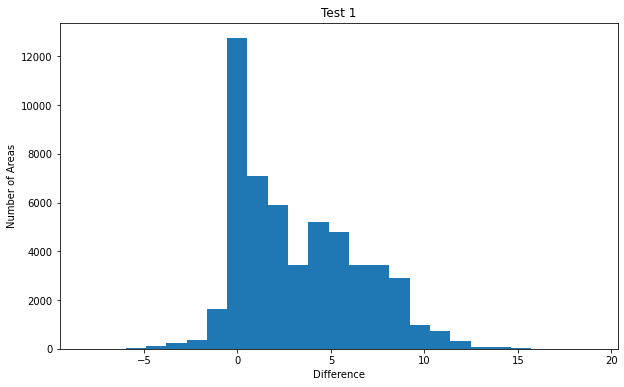

In [ ]:
# Visualize
t1 = join["Test 1"].plot(kind="hist", bins=25, title="Test 1", figsize=(10,6))
t1.set_xlabel("Difference")
t1.set_ylabel("Number of Areas")
display(t1)

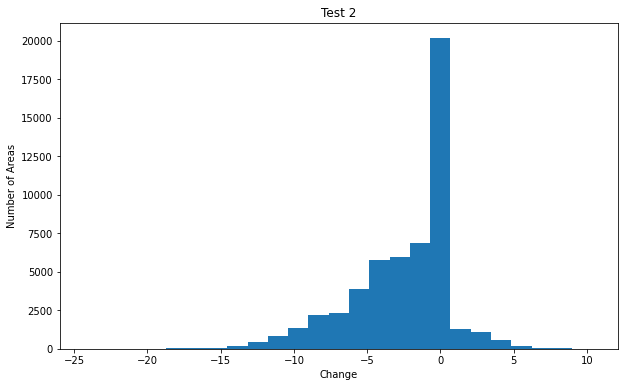

In [ ]:
# Visualize
t2 = join["Test 2"].plot(kind="hist", bins=25, title="Test 2", figsize=(10,6))
t2.set_xlabel("Change")
t2.set_ylabel("Number of Areas")
display(t2)

## Create specific views of results
### Coastwide

In [ ]:
# Set some display values
pandas.options.display.float_format = '{:,.2f}'.format
sorter = ["High", "Medium High", "Medium", "Medium Low", "Low"]

view = join.groupby(["SocVul_Cat"])["Weighted_Pop", "Weighted_White_Pop"].sum()
view["Weighted_NonWhite_Pop"] = view["Weighted_Pop"] - view["Weighted_White_Pop"]
pop = view["Weighted_Pop"].sum()
nwpop = view["Weighted_NonWhite_Pop"].sum()
view["Percent of Coastwide Population"] = (view['Weighted_Pop']/pop)*100
view["Percent of this Social Vulnerability Category that is NonWhite"] = (view['Weighted_NonWhite_Pop']/view['Weighted_Pop'])*100
view.reindex(sorter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


Weighted_Pop  Weighted_White_Pop  Weighted_NonWhite_Pop  \
SocVul_Cat                                                             
High             5,441.00              786.00               4,655.00   
Medium High     58,299.00           21,245.00              37,054.00   
Medium         482,828.00          328,561.00             154,267.00   
Medium Low      62,403.00           49,245.00              13,158.00   
Low                908.00              743.00                 165.00   

             Percent of Coastwide Population  \
SocVul_Cat                                     
High                                    0.89   
Medium High                             9.56   
Medium                                 79.17   
Medium Low                             10.23   
Low                                     0.15   

             Percent of this Social Vulnerability Category that is NonWhite  
SocVul_Cat                                                                   
High                                                     85.55               
Medium High                                              63.56               
Medium                                                   31.95               
Medium Low                                               21.09               
Low                                                      18.17

### Test 1
#### View 1: Percent of total population that will be better/worse off

In [ ]:
view1 = join.groupby(["Test 1 Cat"])[["Weighted_Pop"]].sum()
view1["Percent of Coastwide Population"] = (view1["Weighted_Pop"]/pop)*100
view1

Weighted_Pop  Percent of Coastwide Population
Test 1 Cat                                                  
Better Off       446,246.00                            73.17
No Difference    153,068.00                            25.10
Worse Off         10,565.00                             1.73

#### View1a: Stats by test category AND vulnerability category

In [ ]:
view1a = join.groupby(by=["Test 1 Cat", "SocVul_Cat"])[["Weighted_Pop", "Weighted_White_Pop"]].sum()
view1a["% of vulnerability class in this category"] = (view1a["Weighted_Pop"]/view["Weighted_Pop"])*100
view1a["% of this test category and vulnerability class that is nonwhite"] = ((view1a["Weighted_Pop"]-view1a["Weighted_White_Pop"])/view1a["Weighted_Pop"])*100
view1a["Above or Below Class % (Above 1 = Disproportionately Minority)"] = view1a["% of this test category and vulnerability class that is nonwhite"] / view["Percent of this Social Vulnerability Category that is NonWhite"]
view1a.reindex(sorter, level=1)

Weighted_Pop  Weighted_White_Pop  \
Test 1 Cat    SocVul_Cat                                      
Better Off    High             4,047.00              620.00   
              Medium High     43,339.00           15,216.00   
              Medium         355,115.00          238,140.00   
              Medium Low      43,394.00           34,041.00   
              Low                351.00              261.00   
No Difference High               841.00              161.00   
              Medium High     13,876.00            5,850.00   
              Medium         118,967.00           84,455.00   
              Medium Low      18,827.00           15,098.00   
              Low                557.00              482.00   
Worse Off     High               553.00                5.00   
              Medium High      1,084.00              179.00   
              Medium           8,746.00            5,966.00   
              Medium Low         182.00              106.00   

                           % of vulnerability class in this category  \
Test 1 Cat    SocVul_Cat                                               
Better Off    High                                             74.38   
              Medium High                                      74.34   
              Medium                                           73.55   
              Medium Low                                       69.54   
              Low                                              38.66   
No Difference High                                             15.46   
              Medium High                                      23.80   
              Medium                                           24.64   
              Medium Low                                       30.17   
              Low                                              61.34   
Worse Off     High                                             10.16   
              Medium High                                       1.86   
              Medium                                            1.81   
              Medium Low                                        0.29   

                           % of this test category and vulnerability class that is nonwhite  \
Test 1 Cat    SocVul_Cat                                                                      
Better Off    High                                                     84.68                  
              Medium High                                              64.89                  
              Medium                                                   32.94                  
              Medium Low                                               21.55                  
              Low                                                      25.64                  
No Difference High                                                     80.86                  
              Medium High                                              57.84                  
              Medium                                                   29.01                  
              Medium Low                                               19.81                  
              Low                                                      13.46                  
Worse Off     High                                                     99.10                  
              Medium High                                              83.49                  
              Medium                                                   31.79                  
              Medium Low                                               41.76                  

                           Above or Below Class % (Above 1 = Disproportionately Minority)  
Test 1 Cat    SocVul_Cat                                                                   
Better Off    High                                                      0.99               
              Medium High                                           

### Test 2
#### View 2: Percent of total population that will be better/worse off

In [ ]:
view2 = join.groupby(["Test 2 Cat"])[["Weighted_Pop"]].sum()
view2["Percent of Coastwide Population"] = (view2["Weighted_Pop"]/pop)*100
view2

Weighted_Pop  Percent of Coastwide Population
Test 2 Cat                                                  
Better Off        34,358.00                             5.63
No Difference    274,399.00                            44.99
Worse Off        301,121.00                            49.37

#### View2b: Stats by test category AND vulnerability category

In [ ]:
view2a = join.groupby(by=["Test 2 Cat", "SocVul_Cat"])[["Weighted_Pop", "Weighted_White_Pop"]].sum()
view2a["% of vulnerability class in this category"] = (view2a["Weighted_Pop"]/view["Weighted_Pop"])*100
view2a["% of this test category and vulnerability class that is nonwhite"] = ((view2a["Weighted_Pop"]-view2a["Weighted_White_Pop"])/view2a["Weighted_Pop"])*100
view2a["Above or Below Class % (Above 1 = Disproportionately Minority)"] = view2a["% of this test category and vulnerability class that is nonwhite"] / view["Percent of this Social Vulnerability Category that is NonWhite"]
view2a.reindex(sorter, level=1)

Weighted_Pop  Weighted_White_Pop  \
Test 2 Cat    SocVul_Cat                                      
Better Off    Medium High      4,995.00            2,563.00   
              Medium          27,661.00           20,070.00   
              Medium Low       1,702.00              738.00   
No Difference High             3,087.00              280.00   
              Medium High     29,256.00            7,889.00   
              Medium         207,126.00          123,950.00   
              Medium Low      34,040.00           26,474.00   
              Low                890.00              730.00   
Worse Off     High             2,354.00              506.00   
              Medium High     24,047.00           10,792.00   
              Medium         248,041.00          184,541.00   
              Medium Low      26,661.00           22,033.00   
              Low                 18.00               13.00   

                           % of vulnerability class in this category  \
Test 2 Cat    SocVul_Cat                                               
Better Off    Medium High                                       8.57   
              Medium                                            5.73   
              Medium Low                                        2.73   
No Difference High                                             56.74   
              Medium High                                      50.18   
              Medium                                           42.90   
              Medium Low                                       54.55   
              Low                                              98.02   
Worse Off     High                                             43.26   
              Medium High                                      41.25   
              Medium                                           51.37   
              Medium Low                                       42.72   
              Low                                               1.98   

                           % of this test category and vulnerability class that is nonwhite  \
Test 2 Cat    SocVul_Cat                                                                      
Better Off    Medium High                                              48.69                  
              Medium                                                   27.44                  
              Medium Low                                               56.64                  
No Difference High                                                     90.93                  
              Medium High                                              73.03                  
              Medium                                                   40.16                  
              Medium Low                                               22.23                  
              Low                                                      17.98                  
Worse Off     High                                                     78.50                  
              Medium High                                              55.12                  
              Medium                                                   25.60                  
              Medium Low                                               17.36                  
              Low                                                      27.78                  

                           Above or Below Class % (Above 1 = Disproportionately Minority)  
Test 2 Cat    SocVul_Cat                                                                   
Better Off    Medium High                                               0.77               
              Medium                                                    0.86               
              Medium Low                                                2.69               
No Difference High                                                      1.06               
              Medium H

## Prep data for export
### Re-label "better off", "worse off" and "no difference" as 3, 1, 2 for bivariate mapping in GIS

In [ ]:
def catTest1(row):
  if row["Test 1"] >= 1:
    return 3
  elif row["Test 1"] <= -1:
    return 1
  elif (row["Test 1"]) < 1 & (row["Test 1"] > -1):
    return 2
  else: 
    return None
def catTest2(row):
  if row["Test 2"] >= 1:
    return 3
  elif row["Test 2"] <= -1:
    return 1
  elif (row["Test 2"]) < 1 & (row["Test 1"] > -1):
    return 2
  else: 
    return None
join["Test 1 Num"] = join.apply(catTest1, axis=1)
join["Test 2 Num"] = join.apply(catTest2, axis=1)
join

pt_v03_ind  FWOA_Hig_6  FWP_High_7  Current_F1  Test 1  Test 2  \
1            79674       14.72       12.42        7.72    2.30   -4.70   
2            15915       17.49       14.45        9.11    3.04   -5.34   
3            76911       18.02       15.21       10.12    2.81   -5.09   
4            16191       17.52       12.31        9.61    5.21   -2.70   
5            78434       19.77       14.08       11.04    5.69   -3.04   
...            ...         ...         ...         ...     ...     ...   
197433       76812        6.05        0.00        0.00    6.05    0.00   
198394       76812        6.05        0.00        0.00    6.05    0.00   
198441       79605        1.80        0.28        0.00    1.53   -0.28   
198498       77583        0.52        0.00        0.00    0.52    0.00   
198515       76961        9.10        0.00        0.00    9.10    0.00   

       STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE  ... NurHom_Cat  DisDep_Cat  \
1             22        103    041202    2012  ...     Medium      Medium   
2             22        103    041202    2012  ...     Medium      Medium   
3             22        103    041202    2012  ...     Medium      Medium   
4             22        103    041202    2012  ...     Medium      Medium   
5             22        103    041202    2012  ...     Medium      Medium   
...          ...        ...       ...     ...  ...        ...         ...   
197433        22        103    040304    4000  ...     Medium      Medium   
198394        22        103    040304    4005  ...     Medium      Medium   
198441        22        103    040304    4007  ...     Medium      Medium   
198498        22        103    040304    4041  ...     Medium      Medium   
198515        22        103    040304    4042  ...     Medium      Medium   

        AsnRes_Cat  SocVul_Cat  Shape_Leng    Shape_Area     Test 1 Cat  \
1           Medium      Medium   36,955.82 48,418,914.83     Better Off   
2           Medium      Medium   36,955.82 48,418,914.83     Better Off   
3           Medium      Medium   36,955.82 48,418,914.83     Better Off   
4           Medium      Medium   36,955.82 48,418,914.83     Better Off   
5           Medium      Medium   36,955.82 48,418,914.83     Better Off   
...            ...         ...         ...           ...            ...   
197433      Medium  Medium Low   11,345.31  4,100,925.45     Better Off   
198394      Medium  Medium Low   11,345.31  4,100,925.45     Better Off   
198441      Medium  Medium Low   11,345.31  4,100,925.45     Better Off   
198498      Medium  Medium Low   11,345.31  4,100,925.45  No Difference   
198515      Medium  Medium Low   11,345.31  4,100,925.45     Better Off   

           Test 2 Cat  Test 1 Num  Test 2 Num  
1           Worse Off           3        1.00  
2           Worse Off           3        1.00  
3           Worse Off           3        1.00  
4           Worse Off           3        1.00  
5           Worse Off           3        1.00  
...               ...         ...         ...  
197433  No Difference           3        2.00  
198394  No Difference           3        2.00  
198441  No Difference           3        2.00  
198498  No Difference           2        2.00  
198515  No Difference           3        2.00  

[53465 rows x 39 columns]

## Export data (as CSV)

In [ ]:
join.to_csv("lamp_results.csv")